In [234]:
import pandas as pd
import numpy as np

In [235]:
#%pip install pandas
#%pip install torch
#%pip install sentence-transformers

In [236]:
# below is the datatset annotated by Jay
data = pd.read_csv('final_dataset_06102022 2.csv')

In [237]:
print(data.shape)

(846, 96)


In [238]:
strs = ["end his life", "end her life", "end my life", "end their lives", "ended his life", "ended her life", "ended my life", "ended their lives", "ending his life", "ending her life", "ending my life", "ending their lives", "ends his life", "ends her life", "ends my life", "ends their lives", "kill oneself", "kill himself", "kill herself", "kill theirselves", "kill myself", "killed oneself", "killed himself", "killed herself", "killed theirselves", "killed myself", "killing oneself", "killing himself", "killing herself", "killing theirselves", "killing myself", "kills oneself", "kills himself", "kills herself", "kills theirselves", "kills myself", "murder oneself", "murder himself", "murder herself", "murder theirselves", "murder myself", "murdered oneself", "murdered himself", "murdered herself", "murdered theirselves", "murdered myself", "murdering oneself", "murdering himself", "murdering herself", "murdering theirselves", "murdering myself", "murders oneself", "murders himself", "murders herself", "murders theirselves", "murders myself", "poison oneself", "poison himself", "poison herself", "poison theirselves", "poison myself", "poisoned oneself", "poisoned himself", "poisoned herself", "poisoned theirselves", "poisoned myself", "poisoning oneself", "poisoning himself", "poisoning herself", "poisoning theirselves", "poisoning myself", "poisons oneself", "poisons himself", "poisons herself", "poisons theirselves", "poisons myself", "drown oneself", "drown himself", "drown herself", "drown theirselves", "drown myself", "drowned oneself", "drowned himself", "drowned herself", "drowned theirselves", "drowned myself", "drowning oneself", "drowning himself", "drowning herself", "drowning theirselves", "drowning myself", "drowns oneself", "drowns himself", "drowns herself", "drowns theirselves", "drowns myself", "strangle oneself", "strangle himself", "strangle herself", "strangle theirselves", "strangle myself", "strangled oneself",  "strangled himself", "strangled herself", "strangled theirselves", "strangled myself", "strangling oneself", "strangling himself", "strangling herself", "strangling theirselves", "strangling myself", "strangles oneself", "strangles himself", "strangles herself", "strangles theirselves", "strangles myself", "suffocate oneself", "suffocate himself", "suffocate herself", "suffocate theirselves", "suffocate myself", "suffocated oneself", "suffocated himself", "suffocated herself", "suffocated theirselves", "suffocated myself", "suffocating oneself", "suffocating himself", "suffocating herself", "suffocating theirselves", "suffocating myself", "suffocates oneself", "suffocates himself", "suffocates herself", "suffocates theirselves", "suffocates myself", "jump to his death", "jump to her death", "jump to their death", "jump to my death", "jumped to his death", "jumped to her death", "jumped to their death", "jumped to my death", "jumping to his death", "jumping to her death", "jumping to their death", "jumping to my death", "jumps to his death", "jumps to her death", "jumps to their death", "jumps to my death", "hang himself", "hang oneself", "hang herself", "hang themselves", "hang myself", "hung himself", "hung oneself", "hung herself", "hung themselves", "hung myself", "hanging himself", "hanging oneself", "hanging herself", "hanging themselves", "hanging myself", "hangs himself", "hangs oneself", "hangs herself", "hangs themselves", "hangs myself", "hungs himself", "hungs oneself", "hungs herself", "hungs themselves", "hungs myself", "shoot oneself", "shoot himself", "shoot herself", "shoot myself", "shoot theirselves", "shot oneself", "shot himself", "shot herself", "shot myself", "shot theirselves", "shooting oneself", "shooting himself", "shooting herself", "shooting myself", "shooting theirselves", "shoots oneself", "shoots himself", "shoots herself", "shoots myself", "shoots theirselves", "shots oneself", "shots himself", "shots herself", "shots myself", "shots theirselves", "die by his hand", "die by his own hand", "die by her hand", "die by her own hand", "die by their hands", "die by their own hands", "die by my hand", "die by my own hand", "take his life", "take his own life", "take her life", "take her own life", "take their lives", "take their own lives", "take my life", "take my own life", "took his life", "took his own life", "took her life", "took her own life", "took their lives", "took their own lives", "took my life", "took my own life", "takes his life", "takes his own life", "takes her life", "takes her own life", "takes their lives", "takes their own lives", "takes my life", "takes my own life", "taking his life", "taking his own life", "taking her life", "taking her own life", "taking their lives", "taking their own lives", "taking my life", "taking my own life","cut oneself", "cut himself", "cut herself", "cut theirselves", "cut myself", "cuts oneself", "cuts himself", "cuts herself", "cuts theirselves", "cuts myself", "cutting oneself", "cutting himself", "cutting herself", "cutting theirselves", "cutting myself", "stab oneself", "stab himself", "stab herself", "stab theirselves", "stab myself", "stabs oneself", "stabs himself", "stabs herself", "stabs theirselves", "stabs myself", "stabbing oneself", "stabbing himself", "stabbing herself", "stabbing theirselves", "stabbing myself", "stabbed oneself", "stabbed himself", "stabbed herself", "stabbed theirselves", "stabbed myself", "cut his throat", "cut her throat", "cut my throat", "cuts his throat", "cuts her throat", "cuts my throat", "cutting his throat", "cutting her throat", "cutting my throat", "cut his wrist", "cut her wrist", "cut my wrist", "cuts his wrist", "cuts her wrist", "cuts my wrist", "cutting his wrist", "cutting her wrist", "cutting my wrist", "slit his throat", "slit her throat", "slit my throat", "slits his throat", "slits her throat", "slits my throat", "slitting his throat", "slitting her throat", "slitting my throat", "slit his wrist", "slit her wrist", "slit my wrist", "slits his wrist", "slits her wrist", "slits my wrist", "slitting his wrist", "slitting her wrist", "slitting my wrist"]

In [239]:
data = data[data['Yes'] == 1]

In [240]:
pattern = r'^news[0-6]_'
datacopy = data.copy()
datacopy['Document name'] = data['Document name'].str.replace(pattern, '', regex=True)

In [241]:
data.head(3)
print(data.shape)

(200, 96)


In [242]:
import torch  
from transformers import BertTokenizer,BertModel

In [243]:
import pandas as pd
import datasets
from transformers import LongformerTokenizerFast, LongformerForSequenceClassification, Trainer, TrainingArguments, LongformerConfig
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
# import wandb
# import os

# # load model and tokenizer and define length of the text sequence
# model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096',
#                                                            gradient_checkpointing=False,
#                                                            attention_window = 512)
# tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length = 1024)

# def tokenization(batched_text):
#     return tokenizer(batched_text['text'], padding = 'max_length', truncation=True, max_length = 1024)

# train_data = train_data.map(tokenization, batched = True, batch_size = len(train_data))
# test_data = test_data.map(tokenization, batched = True, batch_size = len(test_data))
def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = 'max_length', truncation=True, max_length = 1024)


import torch
from transformers import LongformerTokenizer, LongformerModel
longformer = "allenai/longformer-base-4096"
tokenizer = LongformerTokenizer.from_pretrained(longformer)
model = LongformerModel.from_pretrained(longformer)

text = "Huggingface has democratized NLP. Huge thanks to Huggingface for this." # I will pas text-column here from my data-frame
#question = "What has Huggingface done ?"
encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 4096)
# global_attention_mask = [1].extend([0]*encoding["input_ids"].shape[-1])
# encoding["global_attention_mask"] = global_attention_mask
# I don't want to use it for Question-Answer use-case. I just need the sentence embeddings
# default is local attention everywhere
# the forward method will automatically set global attention on question tokens
#o = model(**encoding)
#embedding1 = model(**encoding).last_hidden_state
embedding = model(**encoding).last_hidden_state.mean(dim=1)
#print(embedding1.shape)
#embedding = embedding1.mean(dim=1)
#print(embedding.shape)
#sentence_embedding = o.last_hidden_state[:,0]

In [244]:
FinancialLabel = "Financial/Job Problem"
Legallabel = "Legal Problem"
SchoolLabel = "School or Academic Related Problem"
HealthLabel = "Lack of Access to Health/Mental Health Care"

In [245]:
relevant = data[data['Yes']==1]
print(relevant.shape)
print(data.shape)

financial_problem = data[data[FinancialLabel] > 0]
school_problem = data[data[SchoolLabel] > 0]
legal_problem = data[data[Legallabel] > 0]
health_problem = data[data[HealthLabel] > 0]
unspecified_circumstance = data[data['Unspecified Circumstance'] > 0]

print("Legal Problem : ", legal_problem.shape[0])
print("Financial/Job Problem : ", financial_problem.shape[0])
print("Lack of Access to Health/Mental Health Care : ", health_problem.shape[0])
print("School or Academic Related Problem : ", school_problem.shape[0])
print("")
print("Other non structural factors: ")

print("Explicit Statement of Mental Health Symptoms or Diagnosis : ", data[data['Explicit Statement of Mental Health Symptoms or Diagnosis'] > 0].shape[0])
print("Social/Relationship Problem : ", data[data['Social/Relationship Problem'] > 0].shape[0])
print("Physical Health Problem : ", data[data['Physical Health Problem'] > 0].shape[0])
print("Crisis plus-minus 2 weeks : ", data[data['Crisis plus-minus 2 weeks'] > 0].shape[0])
print("Loss of Sense of Purpose or Hope: ", data[data['Loss of Sense of Purpose or Hope'] > 0].shape[0])
print("History of Child Abuse : ", data[data['History of Child Abuse'] > 0].shape[0])
print("Lack of Social Support : ", data[data['Lack of Social Support'] > 0].shape[0])
print("Death of Friend or Family Member : ", data[data['Death of Friend or Family Member'] > 0].shape[0])
print("Alcohol Dependence : ", data[data['Alcohol Dependence'] > 0].shape[0])
print("Other Substance Problem : ", data[data['Other Substance Problem'] > 0].shape[0])
print("Disengaged in Activities : ", data[data['Disengaged in Activities'] > 0].shape[0])
print("Access to Means to Harm Self : ", data[data['Access to Means to Harm Self'] > 0].shape[0])
print("Other Circumstance: ", data[data['Other Circumstance'] > 0].shape[0])
print("Unspecified Circumstance: ", data[data['Unspecified Circumstance'] > 0].shape[0])

(200, 96)
(200, 96)
Legal Problem :  39
Financial/Job Problem :  13
Lack of Access to Health/Mental Health Care :  7
School or Academic Related Problem :  5

Other non structural factors: 
Explicit Statement of Mental Health Symptoms or Diagnosis :  35
Social/Relationship Problem :  30
Physical Health Problem :  26
Crisis plus-minus 2 weeks :  8
Loss of Sense of Purpose or Hope:  11
History of Child Abuse :  6
Lack of Social Support :  6
Death of Friend or Family Member :  2
Alcohol Dependence :  2
Other Substance Problem :  7
Disengaged in Activities :  0
Access to Means to Harm Self :  2
Other Circumstance:  8
Unspecified Circumstance:  56


In [246]:
school_problem_df = pd.DataFrame(school_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in school_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

school_problem_df['Text'] = arrayoftexts

school_problem_embeddings = []

for text in school_problem_df['Text']:
    encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    school_problem_embeddings.append(embedding.detach().numpy())
print(school_problem_embeddings)
school_problem_averaged_embedding = np.mean(school_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


[array([[ 6.53205439e-02, -1.42457280e-02,  5.03250211e-02,
        -3.18272300e-02,  8.50221366e-02,  2.80249901e-02,
         2.23418586e-02,  4.92520481e-02,  6.39135242e-02,
        -2.79987417e-02, -1.53593481e-01, -1.15477279e-01,
         1.99843291e-02,  5.81504107e-02,  9.08264518e-02,
        -1.91020623e-01,  1.86366327e-02, -7.70641863e-02,
        -1.32323384e-01, -1.15768924e-01, -2.21068948e-03,
         8.35515633e-02, -8.93545374e-02,  6.21532463e-03,
        -2.04050373e-02,  2.54341923e-02,  9.38918889e-02,
         6.66427389e-02, -9.61541198e-04, -2.26726811e-02,
        -1.07245430e-01, -2.50388570e-02,  4.30037417e-02,
         3.84975076e-02, -9.19285119e-02,  4.46425341e-02,
         6.83070198e-02,  3.40467319e-02,  4.00666475e-01,
         2.17567291e-02,  5.33027481e-03, -1.47815332e-01,
         1.24007203e-02, -4.16095369e-02,  4.07150798e-02,
         2.78524775e-02, -1.18046232e-01,  7.62785971e-02,
         2.71059833e-02, -1.32051473e-02,  4.70655113e-

In [247]:
legal_problem_df = pd.DataFrame(legal_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in legal_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

legal_problem_df['Text'] = arrayoftexts

legal_problem_embeddings = []

for text in legal_problem_df['Text']:
    encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    legal_problem_embeddings.append(embedding.detach().numpy())

legal_problem_averaged_embedding = np.mean(legal_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  1058.4615384615386


In [248]:
# # all the legal problem articles matched wit the averaged legal problem embedding
# sentences = arrayoftexts

# #Encode all sentences
# embeddings = model.encode(sentences)

# #Compute cosine similarity between all pairs
# #cos_sim = util.cos_sim(embeddings, embeddings)
# cos_sim = util.cos_sim(embeddings, legal_problem_averaged_embedding)
# print(cos_sim)

In [249]:
financial_problem_df = pd.DataFrame(financial_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in financial_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

financial_problem_df['Text'] = arrayoftexts

financial_problem_embeddings = []

for text in financial_problem_df['Text']:
    encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    financial_problem_embeddings.append(embedding.detach().numpy())

financial_problem_averaged_embedding = np.mean(financial_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  1497.6153846153845


In [259]:
financial_problem_df

,Document group,Document name,Text
127,CausalFramingNewsSubset4,news5_108760,underage sex scandal rocks police departments...
243,CausalFramingNewsSubset4,news5_146755,keystone pipeline defiance triggers further as...
263,CausalFramingNewsSubset4,news5_151566,pride and pain in trump country: ’we all grew ...
333,CausalFramingNewsSubset4,news6_188182,canada holds emergency debate over aboriginal ...
382,,news6_157209,kevin durant’s exit hurts an oklahoma mourning...
411,,news6_212269,vince foster was my brother. donald trump shou...
457,,news6_211501,was a va. firefighter humiliated by co-workers...
560,,news4_52352,indian immigrants rethink the american dream ...
571,,news6_214029,do japanese really work themselves to death? i...
600,CausalFramingNewSubset3,news6_202878,5 road trips to help you explore america’s gho...


In [258]:
financial_problem_df['Text'].to_list()

[' underage sex scandal rocks police departments in northern california  a sex scandal involving a teenage prostitute and more than two dozen police officers has shaken several law enforcement agencies in northern california, prompting multiple investigations and the resignation of a major city police chief. the woman, now 18, alleges she was involved with at least 31 officers from across the bay area, accepting money in exchange for sex and, at times, tips on when and where police would be cracking down on prostitution. some of the encounters, she said, happened when she was a minor. “be safe today!! want some advice?” one officer texted her before warning about an undercover sting. “thank you daddy,” she texted back, according to messages she provided to local media. “i appreciate it ion wanna go to jail lol. ” the allegations have implicated officers in seven separate police departments, including the oakland police department, where five officers were placed on administrative leave

In [250]:
health_problem_df = pd.DataFrame(health_problem, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in health_problem_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

health_problem_df['Text'] = arrayoftexts

health_problem_embeddings = []

for text in health_problem_df['Text']:
    encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    health_problem_embeddings.append(embedding.detach().numpy())
    
health_problem_averaged_embedding = np.mean(health_problem_embeddings, axis = 0)
print("Average word count: ", avgwordcount)


Average word count:  949.5714285714286


In [251]:
health_problem_embeddings

[array([[ 4.87259664e-02,  9.62275565e-02,  8.08971077e-02,
         -1.10657364e-01,  1.27555802e-01,  1.42208021e-02,
         -3.97845171e-04,  5.33852652e-02,  1.49062416e-02,
         -1.89723745e-02,  7.07369298e-03, -1.39143646e-01,
          4.03157063e-02, -1.16919810e-02,  9.40764546e-02,
         -6.65303506e-03,  1.95214584e-01, -4.84371036e-02,
         -7.81989843e-02,  5.50433397e-02,  2.11811084e-02,
          1.57042831e-01, -6.56594634e-02,  9.13024321e-03,
         -1.18360944e-01,  1.58764347e-02,  7.08469301e-02,
          1.27408534e-01, -2.20172852e-02, -4.11817878e-02,
         -1.25348687e-01, -3.84543315e-02,  5.39469309e-02,
          4.61663958e-03, -9.39279497e-02, -2.47394592e-02,
         -9.59049538e-03,  4.05359603e-02,  4.71140563e-01,
          8.17940161e-02, -8.75289366e-03, -1.04887202e-01,
         -5.64761925e-04, -4.57920358e-02,  2.95067970e-02,
          8.51998571e-03, -8.88504684e-02,  1.51806682e-01,
          1.42100267e-02, -1.45223783e-0

In [252]:
all_embeddings = financial_problem_embeddings + legal_problem_embeddings + school_problem_embeddings + health_problem_embeddings

labels = []
for i in range(len(financial_problem_embeddings)):
    labels.append(FinancialLabel)
for i in range(len(legal_problem_embeddings)):
    labels.append(Legallabel)
for i in range(len(school_problem_embeddings)):
    labels.append(SchoolLabel)
for i in range(len(health_problem_embeddings)):
    labels.append(HealthLabel)

### Processing of articles with cause 'Unspecified Circumstance'

In [213]:
unspecified_circumstance_df = pd.DataFrame(unspecified_circumstance, columns=['Document group', 'Document name'])
arrayoftexts = []
wordcount = 0.0
for documentname in unspecified_circumstance_df['Document name']:
    #print(documentname)
    with open("articles/"+ documentname + ".txt") as f:
        text = f.readlines()
        arrayoftexts.append(text[0])
        wordcount += len(text[0].split())
avgwordcount = wordcount/len(arrayoftexts)

unspecified_circumstance_df['Text'] = arrayoftexts

unspecified_circumstance_embeddings = []

for text in unspecified_circumstance_df['Text']:
    encoding = tokenizer(text, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    #print(embedding.shape)
    unspecified_circumstance_embeddings.append(embedding[0].detach().numpy())

print("Average word count: ", avgwordcount)


Average word count:  1164.625


In [214]:
type(unspecified_circumstance_embeddings[0].shape)

tuple

In [215]:
from sentence_transformers import SentenceTransformer,util
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader

cos_sim_unspecified_circumstance_financial = util.cos_sim(unspecified_circumstance_embeddings, financial_problem_averaged_embedding)
cos_sim_unspecified_circumstance_legal = util.cos_sim(unspecified_circumstance_embeddings, legal_problem_averaged_embedding)
cos_sim_unspecified_circumstance_school = util.cos_sim(unspecified_circumstance_embeddings, school_problem_averaged_embedding)
cos_sim_unspecified_circumstance_health = util.cos_sim(unspecified_circumstance_embeddings, health_problem_averaged_embedding)


In [216]:
print("Max similarity of unspecified circumstance for financial problem: ", torch.max(cos_sim_unspecified_circumstance_financial))
print("Max similarity of unspecified circumstance for legal problem: ", torch.max(cos_sim_unspecified_circumstance_legal))
print("Max similarity of unspecified circumstance for school problem: ", torch.max(cos_sim_unspecified_circumstance_school))
print("Max similarity of unspecified circumstance for health problem: ", torch.max(cos_sim_unspecified_circumstance_health))

Max similarity of unspecified circumstance for financial problem:  tensor(0.9965)
Max similarity of unspecified circumstance for legal problem:  tensor(0.9954)
Max similarity of unspecified circumstance for school problem:  tensor(0.9957)
Max similarity of unspecified circumstance for health problem:  tensor(0.9952)


In [217]:
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_financial)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_legal)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_school)])
print(arrayoftexts[torch.argmax(cos_sim_unspecified_circumstance_health)])

rape allegations, a breakout star, and the oscars: how the attempt to smooth nate parker’s past failed so badly  hollywood has given us many a master class in warped priorities, but film studio fox searchlight might have outdone them all, with one of the worst botched publicity campaigns maybe ever.    as it prepares for the october 7 release of its highly anticipated drama the birth of a nation, the studio has attempted to preemptively stave off awards season backlash by addressing   nate parker’s tumultuous past head on. but instead of bolstering the film’s oscar chances, it has created an extraordinarily ugly controversy, and everyone involved is worse off for it. this isn’t about a parking ticket pileup, or a troubled youth. it’s about parker and his birth of a nation   jean celestin being charged with rape 17 years ago, when they were wrestling teammates in college. (parker was acquitted and celestin was convicted, before the conviction was eventually overturned on appeal.) and it

In [218]:
import csv
texts = ["Financial/Job Problem", "Legal Problem", "School or Academic Related Problem", "Lack of Access to Health/Mental Health Care"] 
embeddingsize = len(financial_problem_averaged_embedding)
header = [i for i in range(embeddingsize)]
header.insert(0, "Structural Violence Factor")



In [219]:
embeddings_final = [financial_problem_averaged_embedding.tolist(), legal_problem_averaged_embedding.tolist(), school_problem_averaged_embedding.tolist(), health_problem_averaged_embedding.tolist()]
for i in range(len(embeddings_final)):
    embeddings_final[i].insert(0, texts[i])

with open('averaged_embeddings.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(embeddings_final)

### Starting processing of unseen articles from the Kaggle dataset (aka which are suicide related but not marked 'Yes')

In [220]:
# below three are the csvs downloaded from the Kaggle 'All the news' dataset as is
data1 = pd.read_csv('articles1.csv')
data2 = pd.read_csv('articles2.csv')
data3 = pd.read_csv('articles3.csv')

data1 = data1[data1['content'].str.contains('|'.join(strs))]
data2 = data2[data2['content'].str.contains('|'.join(strs))]
data3 = data3[data3['content'].str.contains('|'.join(strs))]

print("Articles from the Kaggle dataset that have matching suicide terms: ", data1.shape[0] + data2.shape[0] + data3.shape[0])
print(data1.shape)
print(data2.shape)
print(data3.shape)

print(data1.shape[0] + data2.shape[0] + data3.shape[0])

Articles from the Kaggle dataset that have matching suicide terms:  1285
(366, 10)
(525, 10)
(394, 10)
1285


In [221]:
ids200 = datacopy['Document name']
numericalids = [int(i) for i in ids200.to_list()]
data1 = data1[~data1['id'].isin(numericalids)]
data2 = data2[~data2['id'].isin(numericalids)]
data3 = data3[~data3['id'].isin(numericalids)]

In [222]:
content1 = data1['content'].tolist()
content2 = data2['content'].tolist()
content3 = data3['content'].tolist()
unseen_articles = content1 + content2 + content3
print(len(unseen_articles))

1089


In [223]:
print(data1.shape[0] + data2.shape[0] + data3.shape[0])

1089


In [224]:
unseen_articles_embeddings = []
for content in unseen_articles:
    encoding = tokenizer(content, return_tensors="pt", padding = 'max_length', truncation=True, max_length = 1024)
    embedding = model(**encoding).last_hidden_state.mean(dim=1)
    #embedding = model.encode(text)
    unseen_articles_embeddings.append(embedding[0].detach().numpy())
    # embedding = model.encode(content)
    # unseen_articles_embeddings.append(embedding)

In [225]:
cos_sim_unseen_financial = util.cos_sim(unseen_articles_embeddings, financial_problem_averaged_embedding)
cos_sim_unseen_legal = util.cos_sim(unseen_articles_embeddings, legal_problem_averaged_embedding)
cos_sim_unseen_school = util.cos_sim(unseen_articles_embeddings, school_problem_averaged_embedding)
cos_sim_unseen_health = util.cos_sim(unseen_articles_embeddings, health_problem_averaged_embedding)


In [226]:
print("Max similarity for financial problem: ", torch.max(cos_sim_unseen_financial))
print("Max similarity for legal problem: ", torch.max(cos_sim_unseen_legal))
print("Max similarity for school problem: ", torch.max(cos_sim_unseen_school))
print("Max similarity for health problem: ", torch.max(cos_sim_unseen_health))

Max similarity for financial problem:  tensor(0.9944)
Max similarity for legal problem:  tensor(0.9948)
Max similarity for school problem:  tensor(0.9940)
Max similarity for health problem:  tensor(0.9942)


In [227]:
print("Min similarity for financial problem: ", torch.min(cos_sim_unseen_financial))
print("Min similarity for legal problem: ", torch.min(cos_sim_unseen_legal))
print("Min similarity for school problem: ", torch.min(cos_sim_unseen_school))
print("Min similarity for health problem: ", torch.min(cos_sim_unseen_health))

Min similarity for financial problem:  tensor(0.8655)
Min similarity for legal problem:  tensor(0.9042)
Min similarity for school problem:  tensor(0.8594)
Min similarity for health problem:  tensor(0.8948)


In [228]:
print(unseen_articles[torch.argmax(cos_sim_unseen_financial)])
print(unseen_articles[torch.argmax(cos_sim_unseen_legal)])
print(unseen_articles[torch.argmax(cos_sim_unseen_school)])
print(unseen_articles[torch.argmax(cos_sim_unseen_health)])

The police cuffed Howard Bryant for allegedly assaulting his wife. Howard Bryant charged the police with racism. Police dropped their charges and Bryant dropped his. [But five years later the ESPN writer clearly hasn’t dropped it.  Bryant posits in the June 6 issue of ESPN the Magazine that “cops singing the national anthem” at sporting events stifles the expression of black athletes. “Nobody seems to care much about this authoritarian shift at the ballpark, yet the media and the public are quick to demand accountability from players they consider insufficiently activist,” Bryant writes. “They blame these black players for not speaking up on behalf of their communities, ignoring the smothering effect that staged patriotism and cops singing the national anthem in a time of Ferguson have on player expression. ” Surely the police from the mean streets of Shelburne Falls (pop. 1, 731) and Buckland (pop. 1, 902) stifled the expression of a black sports journalist, at least until he could st

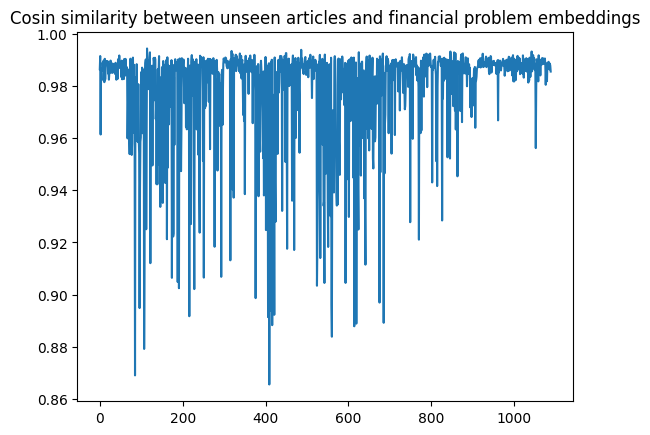

In [229]:
x = [i for i in (range(cos_sim_unseen_financial.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_financial.flatten()
plt.title('Cosin similarity between unseen articles and financial problem embeddings')
plt.plot(x, flattened)



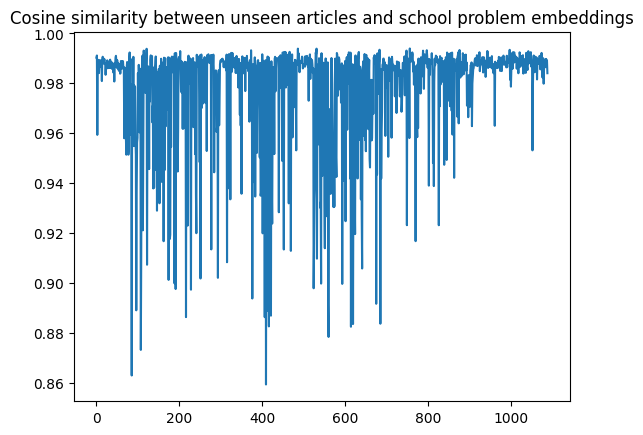

In [230]:
x = [i for i in (range(cos_sim_unseen_school.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_school.flatten()
plt.title('Cosine similarity between unseen articles and school problem embeddings')
plt.plot(x, flattened)

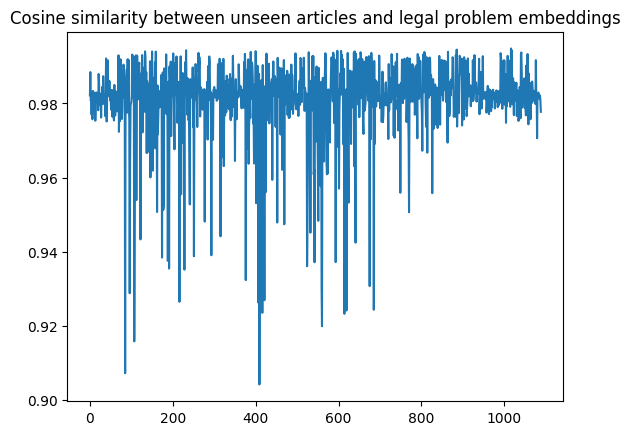

In [231]:
x = [i for i in (range(cos_sim_unseen_legal.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_legal.flatten()
plt.title('Cosine similarity between unseen articles and legal problem embeddings')
plt.plot(x, flattened)

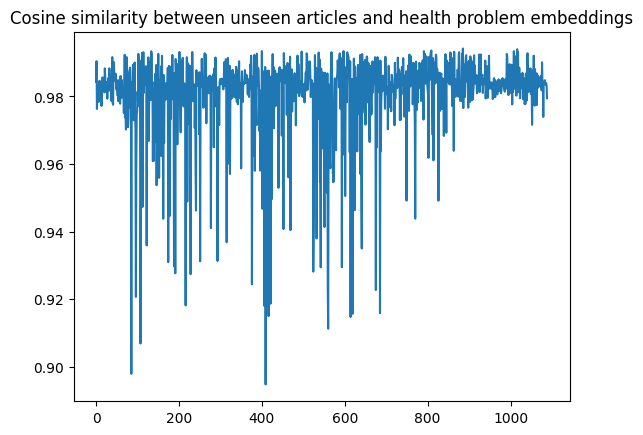

In [232]:
x = [i for i in (range(cos_sim_unseen_health.shape[0]))]
#print(x)
import matplotlib.pyplot as plt
flattened = cos_sim_unseen_health.flatten()
plt.title('Cosine similarity between unseen articles and health problem embeddings')
plt.plot(x, flattened)

In [233]:

print("Mean cosine similarity of all articles for financial problem ", torch.mean(cos_sim_unseen_financial))
print("Mean cosine similarity of all articles for legal problem ", torch.mean(cos_sim_unseen_legal))
print("Mean cosine similarity of all articles for school problem ", torch.mean(cos_sim_unseen_school))
print("Mean cosine similarity of all articles for health problem ", torch.mean(cos_sim_unseen_health))

print("Standard deviation of cosine similarity of all articles for financial problem ", torch.std(cos_sim_unseen_financial))
print("Standard deviation of cosine similarity of all articles for legal problem ", torch.std(cos_sim_unseen_legal))
print("Standard deviation of cosine similarity of all articles for school problem ", torch.std(cos_sim_unseen_school))
print("Standard deviation of cosine similarity of all articles for health problem ", torch.std(cos_sim_unseen_health))

Mean cosine similarity of all articles for financial problem  tensor(0.9782)
Mean cosine similarity of all articles for legal problem  tensor(0.9807)
Mean cosine similarity of all articles for school problem  tensor(0.9775)
Mean cosine similarity of all articles for health problem  tensor(0.9804)
Standard deviation of cosine similarity of all articles for financial problem  tensor(0.0206)
Standard deviation of cosine similarity of all articles for legal problem  tensor(0.0115)
Standard deviation of cosine similarity of all articles for school problem  tensor(0.0220)
Standard deviation of cosine similarity of all articles for health problem  tensor(0.0133)


### Experiments on Kaggle news dataset finished